# Lesson 1.1: R basics and Calculating Screening Values 

Lesson 1.1 Goals: 

- Learn what a package is, install and load `tidyverse`
- Create objects, vectors, and a data frame in R
- Calculate the screening value of mercury for different consumption rates
- Visualize screening values  

## Loading packages

To use different functions, we need to install and load packages. Think of functions as a tool, and a package as a toolbox. For this module we will bring in [tidyverse](https://www.tidyverse.org/), which is a collection of useful packages for data science. 

In [1]:
# Load packages 
if(!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)

Loading required package: tidyverse

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'tidyverse'"
also installing the dependencies 'colorspace', 'sys', 'bit', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'rematch', 'askpass', 'bit64', 'prettyunits', 'backports', 'generics', 'blob', 'DBI', 'tidyselect', 'withr', 'data.table', 'gtable', 'isoband', 'scales', 'gargle', 'cellranger', 'curl', 'ids', 'rematch2', 'cpp11', 'pkgconfig', 'openssl', 'timechange', 'systemfonts', 'textshaping', 'clipr', 'vroom', 'tzdb', 'progress', 'callr', 'selectr', 'fansi', 'broom', 'conflicted', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'hms', 'httr', 'lubridate', 'modelr', 'purrr', 'ragg', 'readr', 'readxl', 'reprex', 'rvest', 'tibble', 'tidyr', 'xml2'




package 'colorspace' successfully unpacked and MD5 sums checked
package 'sys' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'rematch' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'backports' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'tidyselect' s

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Creating objects in R 

We will work with different types of objects and data types, including numbers, characters, vectors, and data frames. Here we start with creating objects for the variables and parameters used to calculate the screening value, or safe limit, of fish consumption. According to the [FDA](https://www.fda.gov/food/environmental-contaminants-food/technical-information-development-fdaepa-advice-about-eating-fish-those-who-might-become-or-are), the screening value, or amount of safe fish consumption, depends on a person's body weight and how often they consume the fish. 

First, the variabls `weight` and `days_per_week` are set. 

Once we create an object, we can use math or functions on it. Below we calculate `CR`, the mean daily consumption rate of the species of interest (g/d), based on the `days_per_week`

In [10]:
# Define variables
weight = 120 # lbs
days_per_week = 1 # days per week eating fish 

# print the values 
print(weight)
print(days_per_week)

[1] 120
[1] 1


In [11]:
# use days per week to calculate mean daily consumption rate 
cr = 110*days_per_week/7 
print(cr)

[1] 15.71429


## Calculating screening values for mercury in fish

Below we use the `weight`, mean daily consumption rate `cr`, and the reference dose `RfD` to calculate the screening value, based on FDA recommendations. Because the equation requires body weight in kg, we multiply our body weight in lbs by 0.45. 

$SV = RfD*weight*0.45/CR$

In [12]:
# Create new object for the reference dose
RfD = 0.1 # ug mercury /kg body weight/day

# Calculate screening value  
screening_value = RfD * weight * 0.45 / cr

print(screening_value)

[1] 0.3436364


💻 Try changing the value for `weight` or `days_per_week`, and rerunning the two code chunks above to see the new safe screening value. 

### Creating vectors 

Next we will create a vector, which is list of the same type of object, that can similarly be used in a function or equation. Below we have two vectors, `weight` and `servings`. 


In [5]:
# Create vectors 
weight = c(140, 175, 200)
servings = c(1, 6, 3)

# can print entire vector 
print(weight)
print(servings)

# or a single value from a vector 
weight[1]

[1] 140 175 200
[1] 1 6 3


[1] 140

### Creating a data frame from vectors 

Multiple vectors of the same length become columns in a data frame. Below we make a data frame named `sv_df`. When we preview it using the `head()` function, we can see it is comprised of two columns, with the same name as the vectors we created. 

Inside a data frame, columns are referred to using `$`. We can also preview a single row, using brackets. 

We then add a third column, where we apply the equation for the screening value to each row 

In [6]:
# create data frame with two columns - from the vectors weight, servings 
sv_df <- data.frame(weight, servings)

head(sv_df) # preview the entire data frame 

head(sv_df$weight) # see the column weight 

# Add column for screening value
sv_df$screen_val = RfD * sv_df$weight * 0.45 / (110 * sv_df$serving / 7)

head(sv_df)

,weight,servings
,<dbl>,<dbl>
1,140,1
2,175,6
3,200,3


[1] 140 175 200

,weight,servings,screen_val
,<dbl>,<dbl>,<dbl>
1,140,1,0.40090909
2,175,6,0.08352273
3,200,3,0.19090909


## Visualizing Screening Value vs. Servings Per Week with ggplot

Above, we used `head()` to preview our data frame. For longer data frames this will print out the first 6 rows. 

Another way to preview and explore data frames is to visualize it. Throughout this module, we will use [ggplot2](https://ggplot2.tidyverse.org/). This package was loaded with `tidyverse`. 

We will create a plot step by step, starting with running `ggplot()` with our dataframe as the input. We then add layers to it using a plus sign. 


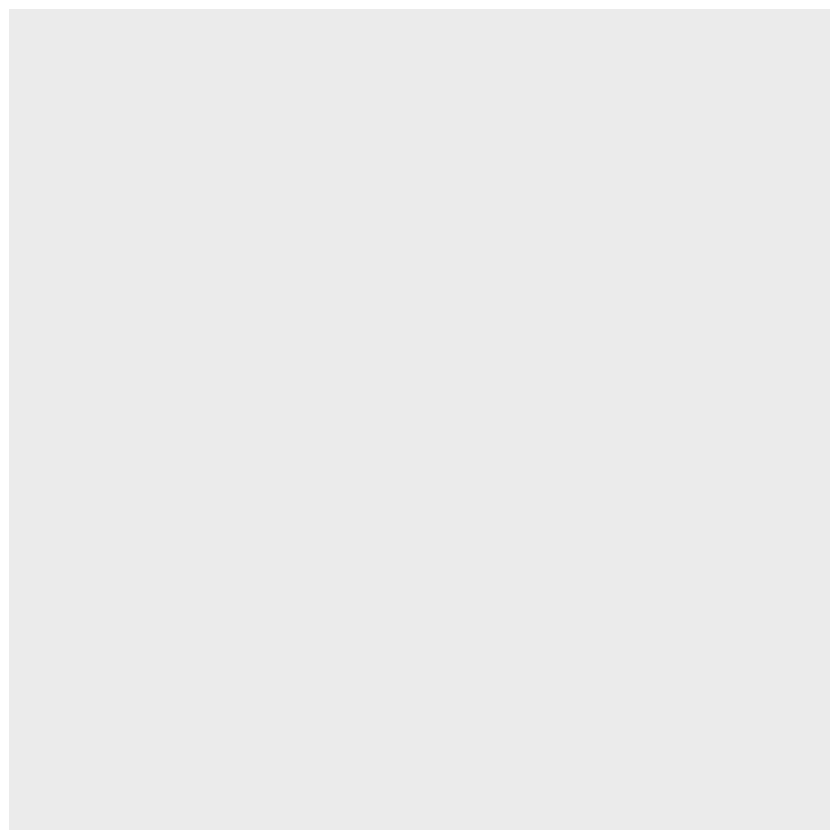

In [7]:
ggplot(data=sv_df)


Starting with `ggplot()` created the plot, but we need to also include the variables we want to plot. We do this using `aes()` and then include the column name you want on the x-axis, and the column name for the y-axis. 


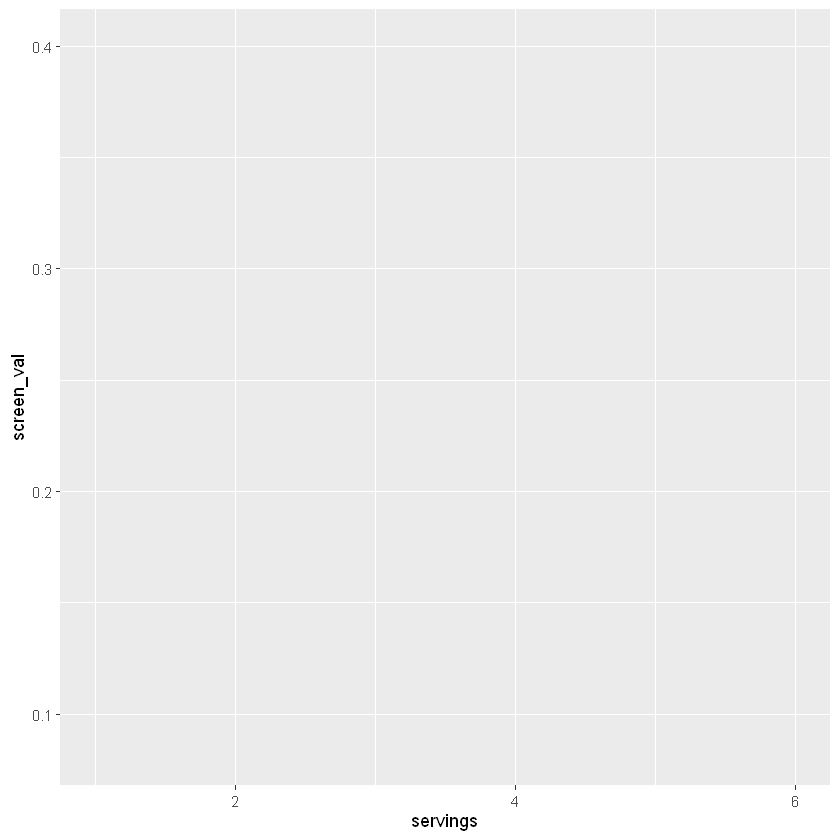

In [8]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val))


Next we need to assign a `geom` - this could be a scatter plot, line plot, or boxplot. We will start with plotting as columns, using `geom_col()`. 


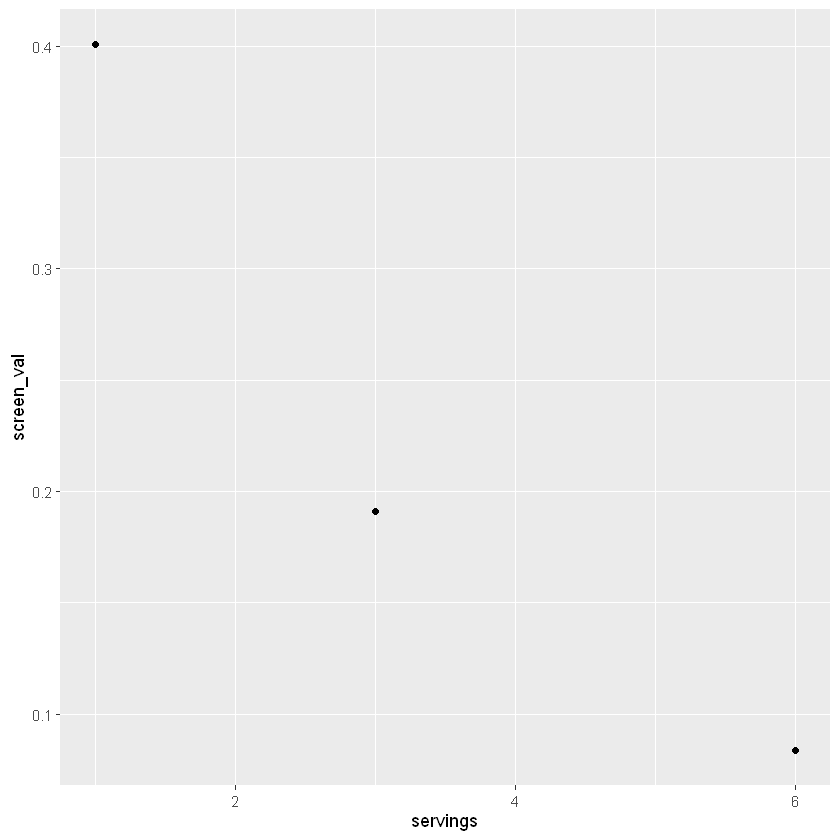

In [9]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val)) + 
    geom_point()


Now we have a draft of our first plot! We can continue to add layers and change the settings to have the plot tell us more about our data, or to make it look nicer. 

Variables can be included as colors - in this example we set the weight to `fill` which will fill in the column with a color gradient for our weight values. 


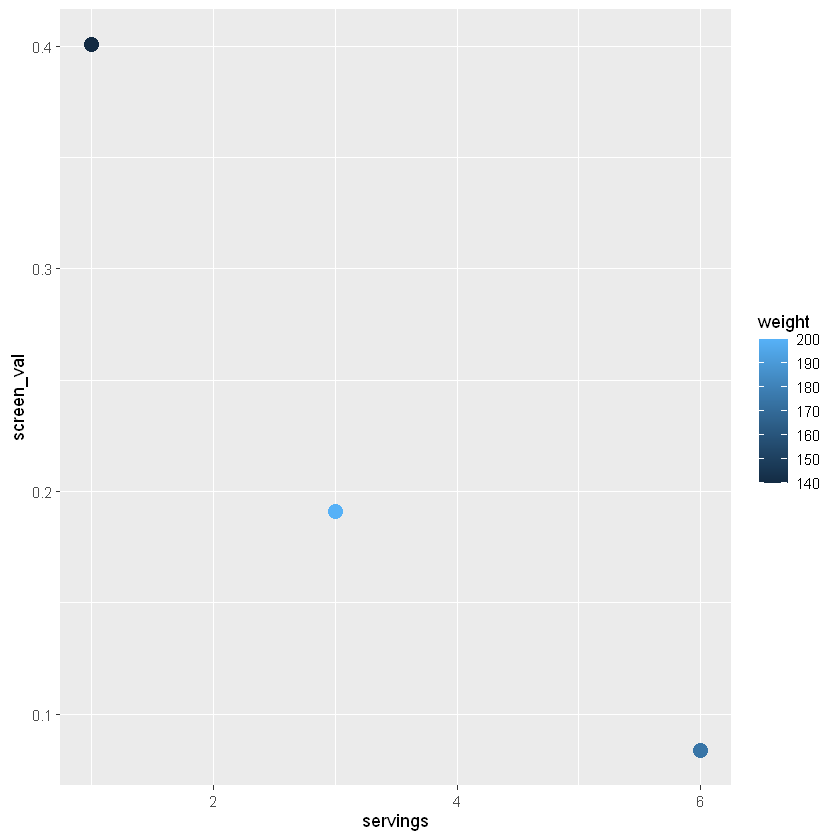

In [10]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val, col=weight)) + 
    geom_point(size=4)


We can also change the `theme`, which alters the background and style of our plot. 


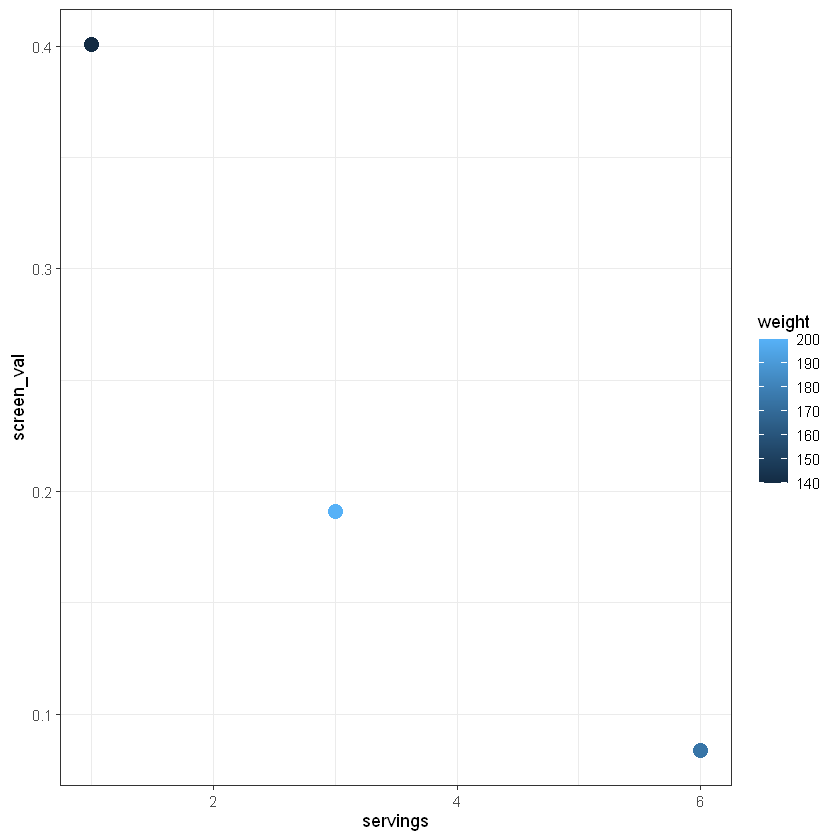

In [11]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val, col=weight)) + 
    geom_point(size=4) +
    theme_bw() 


Finally we can add a title and change the labels to be more descriptive using `labs()`. 

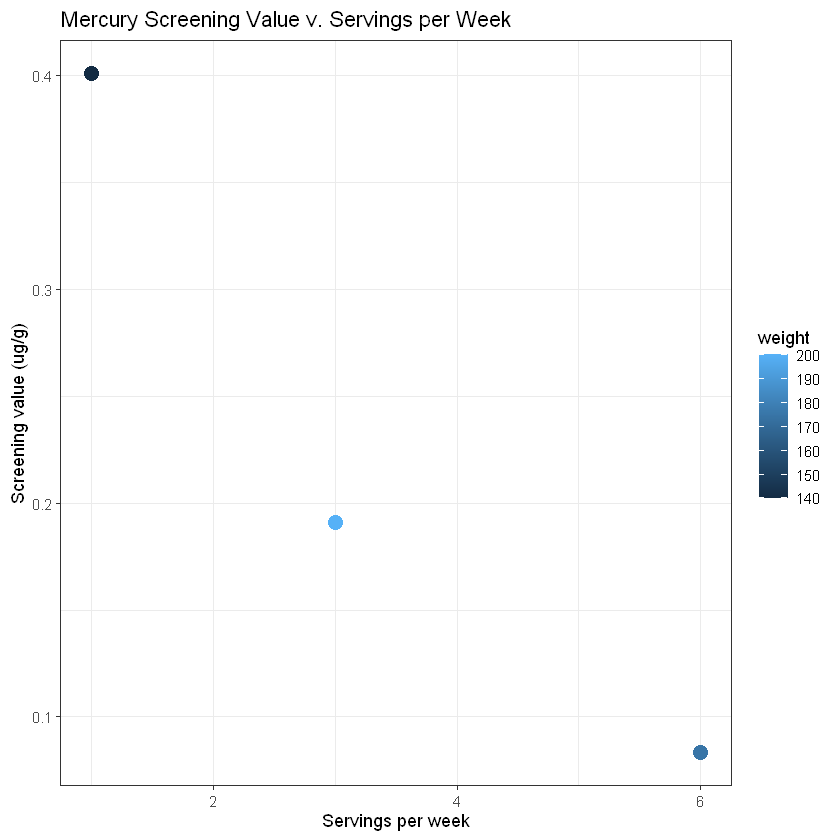

In [12]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val, col=weight)) + 
    geom_point(size=4) +
    theme_bw() +
    labs(x="Servings per week", y="Screening value (ug/g)", title="Mercury Screening Value v. Servings per Week")

You should start to see a relationship between servings per week and screening value, but there are only 3 data points included above. Run the following code to create a similar plot with more data and get a better idea of the relationship between weight, servings per week, and screening value. 

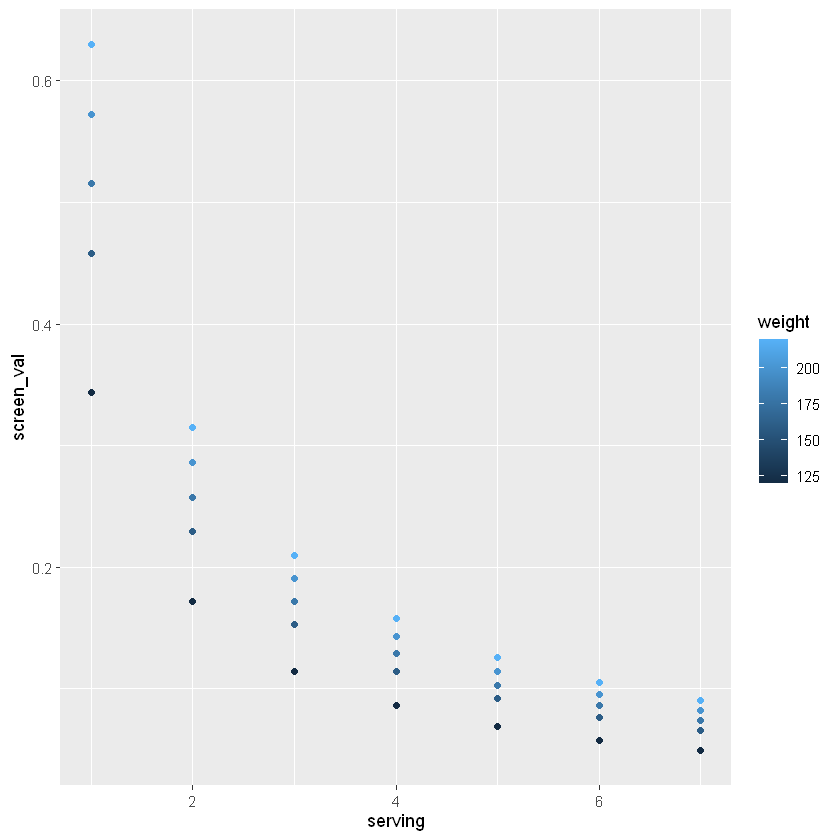

In [14]:
weight = rep(c(120, 160, 180, 200, 220), 7)
serving = rep(seq(1:7), 5)
sv_df_long = data.frame(weight, serving)
sv_df_long$screen_val = RfD*sv_df_long$weight*0.45/(110*sv_df_long$serving/7)
ggplot(sv_df_long) + geom_point(aes(x=serving, y=screen_val, col=weight))

🧠✍️ **Class Questions** 

*  How would you describe this graph and the relationship between screening value, consumption rate, and weight? What happens to the distribution in screening values as the number of servings per week increase?
*   With this information in mind, consider how to make decisions with the data on mercury content in fish -- how should we consider the screening value for different ages? For example, what screening value would be safer for children, who weigh less than the average adult? 

## Lesson 1.1 Recap

In Lesson 1.1 we learned how to:
- define and `print()` an object in R 
- use R for equations
- create a vector and a data frame
- visualize data with `ggplot()`
- describe the relationsihp between weight, servings of fish, and screening values of mercury 

We will build on this in the following lessons. 